In [1]:
import numpy as np

data = np.genfromtxt('data.csv', delimiter=',')

In [2]:
y = data[:,0]
x = data[:,1:22]
x = np.nan_to_num(x, nan=0.0)

In [3]:
y = np.where(y >= 1, 1, y)
print(y[0])

0.0


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [6]:
import tensorflow.keras as ks

model = ks.Sequential([
    ks.layers.Dense(32, activation='relu', input_shape=(x.shape[1],)),
    ks.layers.Dense(16, activation='relu'),
    ks.layers.Dense(8, activation='relu'),
    ks.layers.Dense(8, activation='relu'),
    ks.layers.Dense(4, activation='relu'),
    ks.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/40
3493/3493 [==============================] - 5s 1ms/step - loss: 0.3672 - accuracy: 0.8247 - val_loss: 0.3330 - val_accuracy: 0.8449
Epoch 2/40
3493/3493 [==============================] - 5s 1ms/step - loss: 0.3133 - accuracy: 0.8531 - val_loss: 0.3040 - val_accuracy: 0.8611
Epoch 3/40
3493/3493 [==============================] - 5s 2ms/step - loss: 0.2981 - accuracy: 0.8598 - val_loss: 0.3080 - val_accuracy: 0.8525
Epoch 4/40
3493/3493 [==============================] - 6s 2ms/step - loss: 0.2897 - accuracy: 0.8627 - val_loss: 0.2821 - val_accuracy: 0.8677
Epoch 5/40
3493/3493 [==============================] - 6s 2ms/step - loss: 0.2822 - accuracy: 0.8666 - val_loss: 0.2855 - val_accuracy: 0.8683
Epoch 6/40
3493/3493 [==============================] - 5s 2ms/step - loss: 0.2803 - accuracy: 0.8678 - val_loss: 0.2736 - val_accuracy: 0.8752
Epoch 7/40
3493/3493 [==============================] - 5s 1ms/step - loss: 0.2747 - accuracy: 0.8697 - val_loss: 0.2748 - val_accuracy:

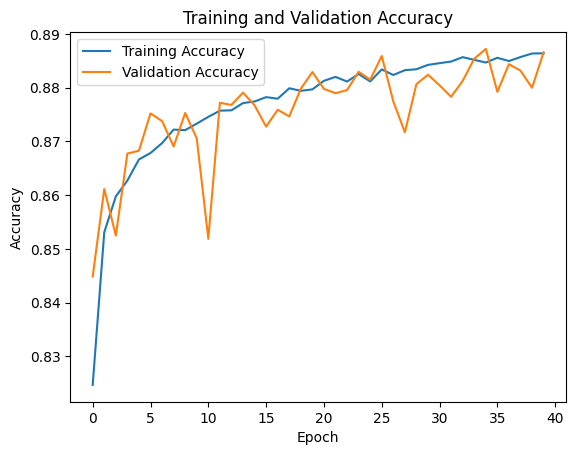

1092/1092 [==============================] - 1s 891us/step - loss: 0.2432 - accuracy: 0.8851
Test Accuracy: 0.8851351141929626


In [7]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_val, y_val))

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)